In [1]:
#lets import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv data 
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# lets check for info of the dataset and the shape
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#lets see the basic numerical data like min,max,std etc for numerical columns
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#lets check for null values in our dataset fields 
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#lets take out the percentage of null values in the field so we can drop the column with higher percentage of null values
null_values = pd.DataFrame(round(train_data.isnull().sum()/len(train_data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null_values.index.name = 'Data field'
null_values.head()

,Null %
Data field,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [7]:
#lets print all the fields having the null values with their percentage
null_values

,Null %
Data field,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
...,...
ExterQual,0.00
Exterior2nd,0.00
Exterior1st,0.00


In [8]:
#lets remove all the columns which have null values of more than 50%
#removing FireplaceQu as well as it's almost near to 50
train_data = train_data.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [9]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [10]:
train_data.shape

(1460, 75)

In [11]:
#lets check for the categorical and numerical columns separately that we have in our dataset
train_data.select_dtypes(exclude='object').columns  #to get all the numerical columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
train_data.select_dtypes(include='object').columns #to get all categorical columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
#as we might have columns with missing values or null values but before that lets check null %  of columsn after removing the highest null % columns
null = pd.DataFrame(round(train_data.isnull().sum()/len(train_data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'field'
null_df = null[null["Null %"] > 0]
null_df

,Null %
field,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


In [14]:
train_data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [15]:
train_data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
train_data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [17]:
train_data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [18]:
train_data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [19]:
train_data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [20]:
train_data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [21]:
train_data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [22]:
train_data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [23]:
train_data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [24]:
train_data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [25]:
train_data['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [26]:
train_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
train_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [28]:
#for the columns "GarageCond","GarageType","GarageFinish","GarageQual","BsmtExposure","BsmtFinType2","BsmtFinType1","BsmtCond","BsmtQual","MasVnrArea","Electrical","MasVnrType" lets impute null values with mode
for i in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','Electrical'):
    train_data[i] = train_data[i].fillna(train_data[i].mode()[0])

In [29]:
#for columns LotFrontage and GarageYrBlt as we have some outliers let impute missing values with median
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

In [30]:
#lets check if we have any more null values
train_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [31]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


EDA on the cleaned Data

In [32]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Target variable 'sale Price' vs a few columns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

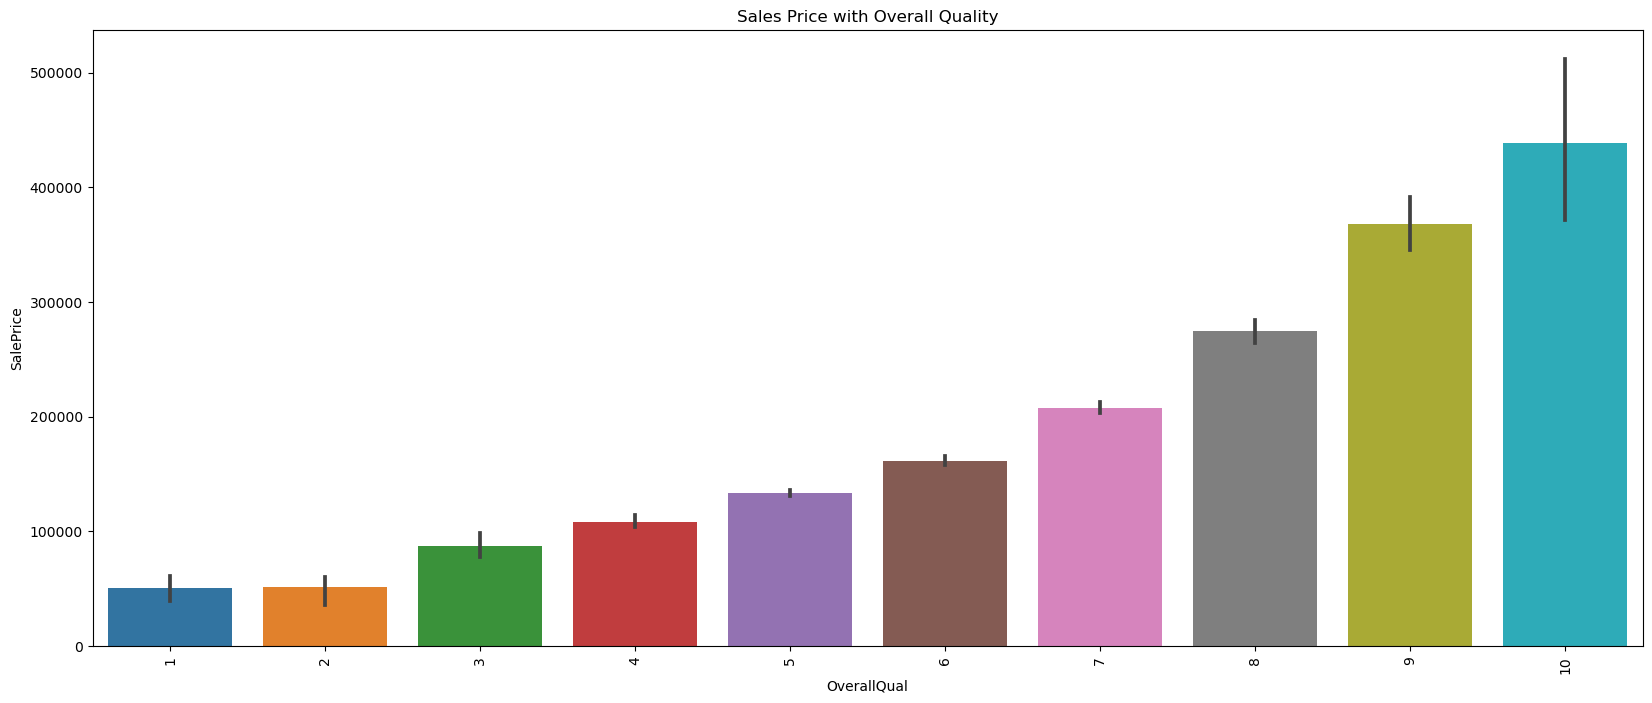

In [33]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= train_data)
plt.title("Sales Price with Overall Quality")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

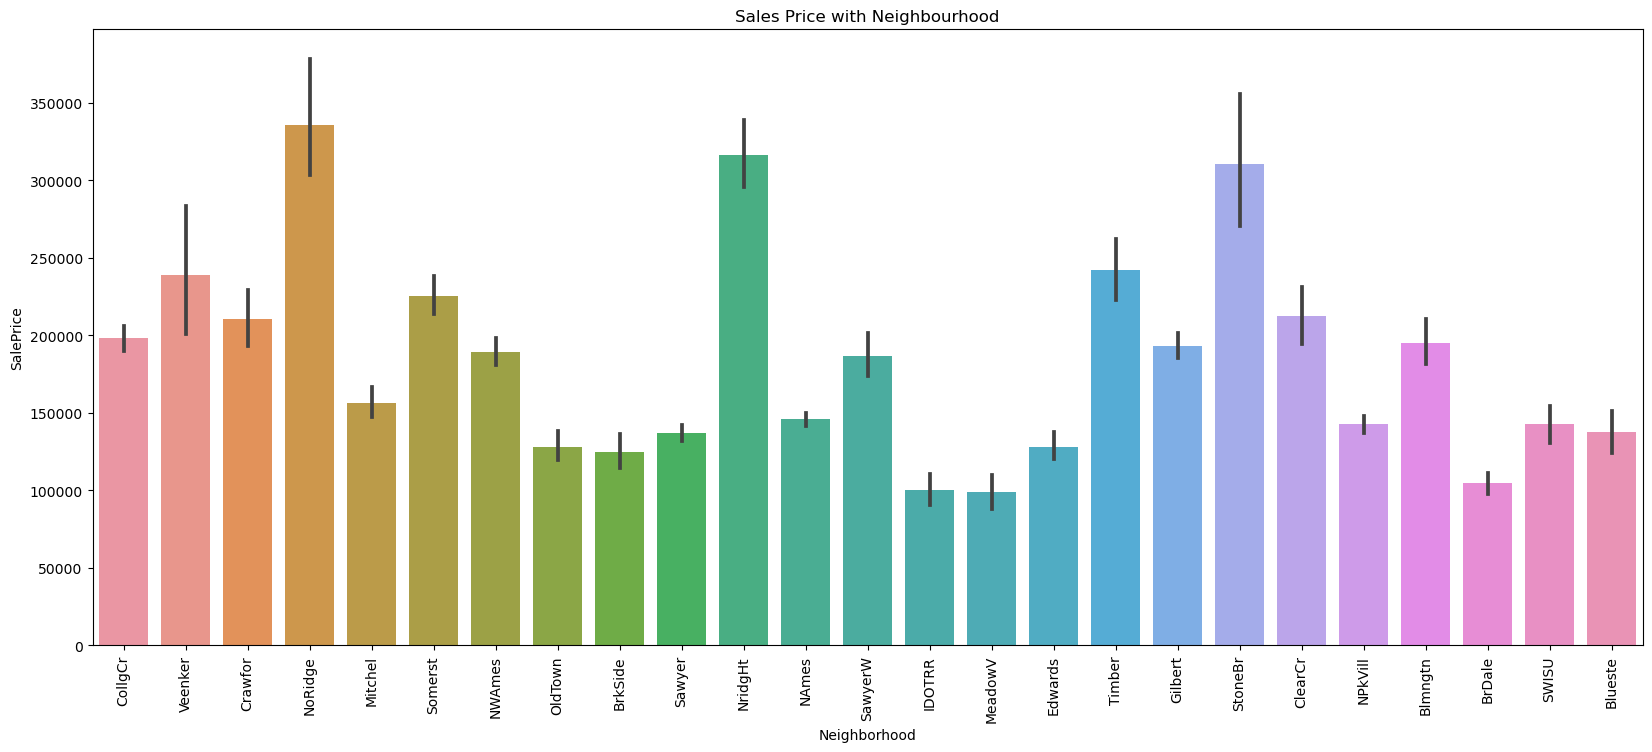

In [34]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= train_data)
plt.title("Sales Price with Neighbourhood")
plt.xticks(rotation=90)

<Axes: xlabel='SalePrice', ylabel='Density'>

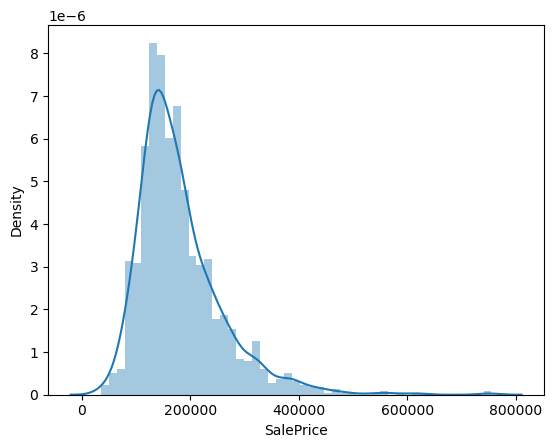

In [35]:
sns.distplot(train_data['SalePrice'])

In [36]:
#as sales price is left skewed lets apply log transformation to get centralized data
train_data['SalePrice']=np.log1p(train_data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

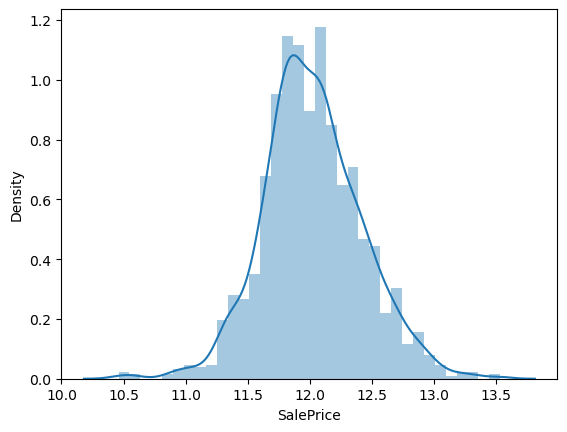

In [37]:
sns.distplot(train_data['SalePrice'])

In [38]:
#lets check for correlatio  matrix
train_data_numeric = train_data.select_dtypes(include=['float64', 'int64'])
train_data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429220


In [39]:
correlation_matrix = train_data_numeric.corr()
correlation_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.335292
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426776
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


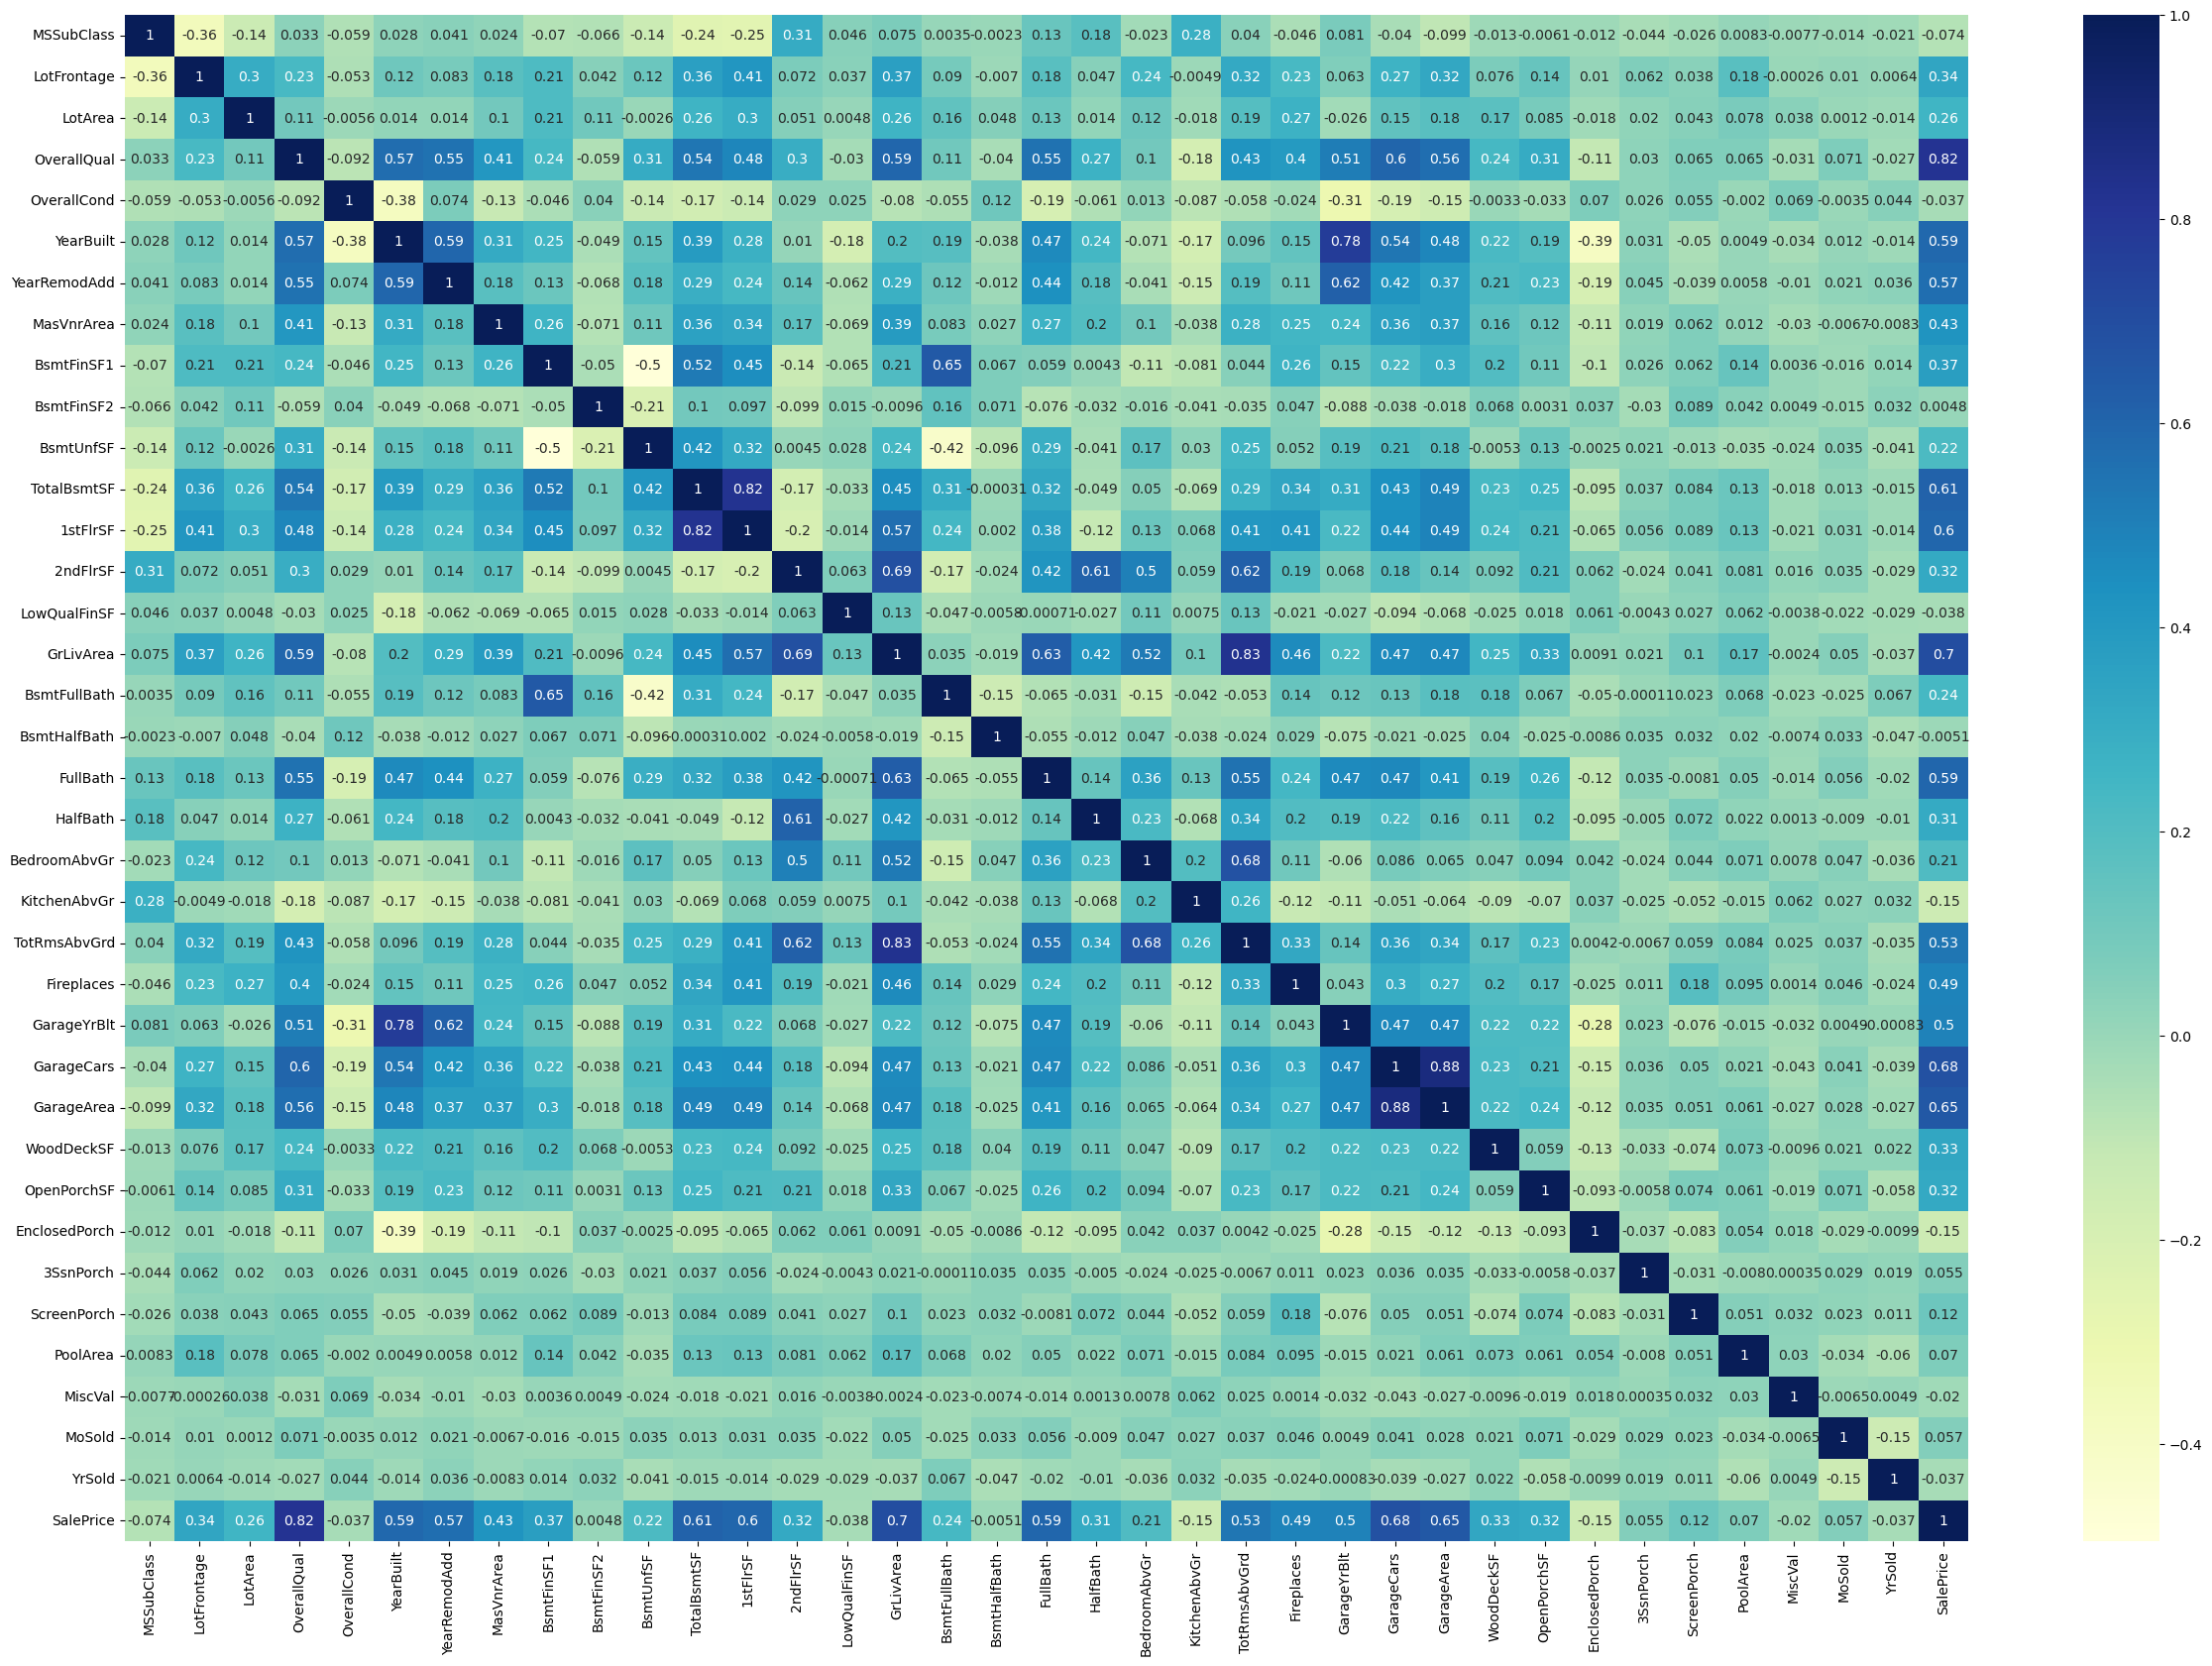

In [40]:
# lets chek for correlations on a heatmap

plt.figure(figsize=(30,20))

sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

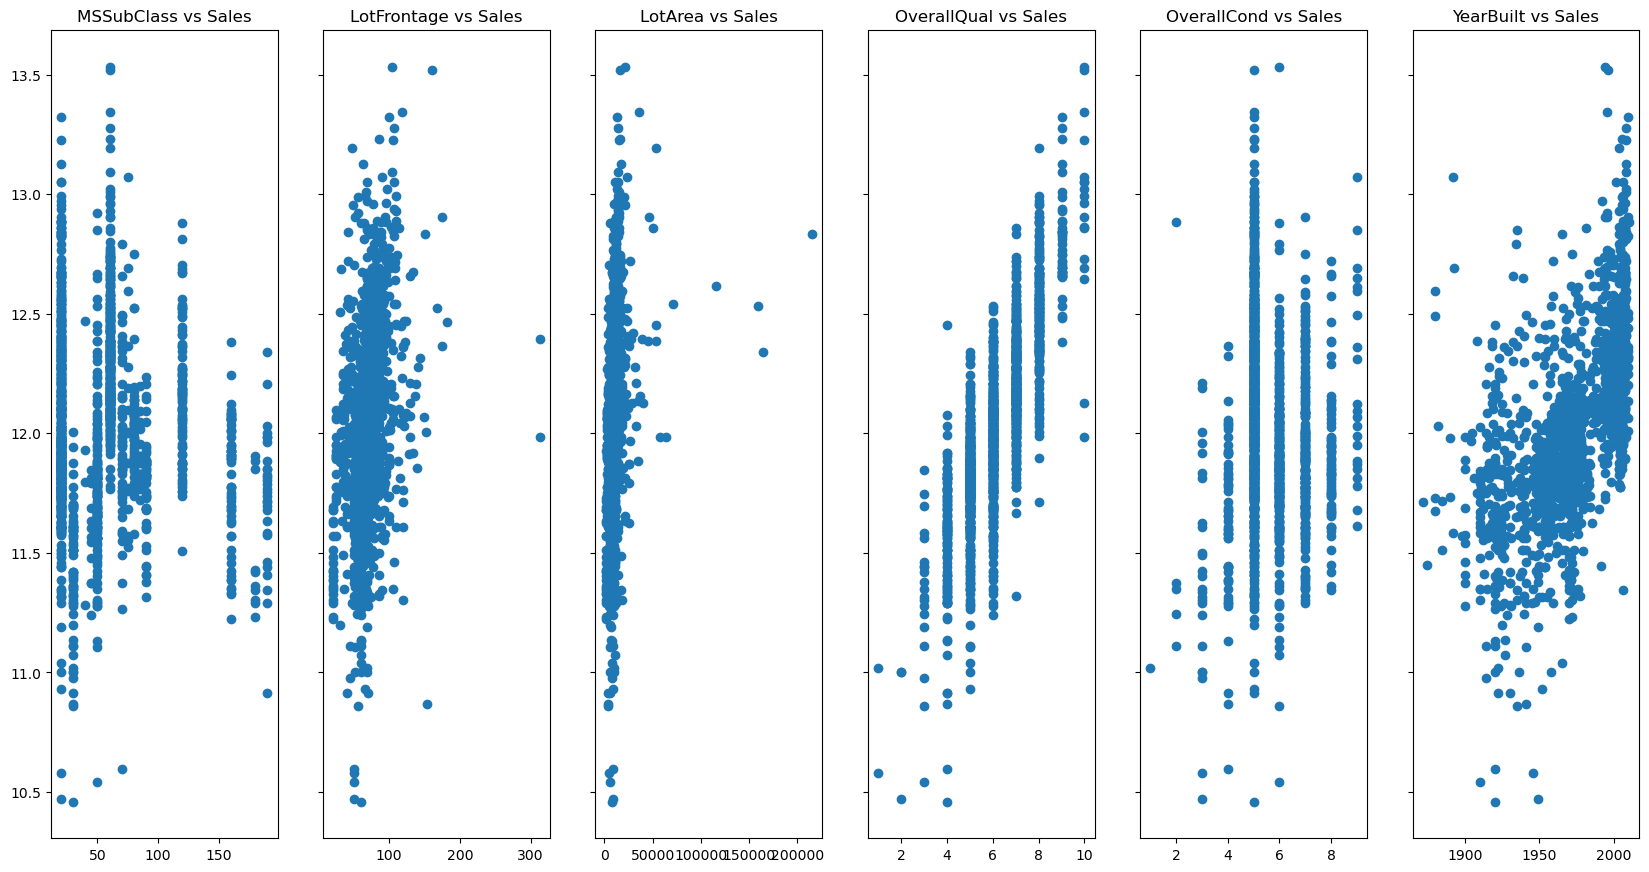

In [41]:
figure, axis = plt.subplots(ncols=6, sharey=True)

MSSubClass = axis[0].scatter(train_data['MSSubClass'], train_data['SalePrice'])
MSSubClass.set_label("MSSubClass")
axis[0].set_title('MSSubClass vs Sales')

LotFrontage= axis[1].scatter(train_data['LotFrontage'], train_data['SalePrice'])
LotFrontage.set_label("LotFrontage")
axis[1].set_title('LotFrontage vs Sales')

LotArea = axis[2].scatter(train_data['LotArea'], train_data['SalePrice'])
LotArea.set_label("LotArea")
axis[2].set_title('LotArea vs Sales')

OverallQual = axis[3].scatter(train_data['OverallQual'], train_data['SalePrice'])
OverallQual.set_label("LotArea")
axis[3].set_title('OverallQual vs Sales')

OverallCond = axis[4].scatter(train_data['OverallCond'], train_data['SalePrice'])
OverallCond.set_label("OverallCond")
axis[4].set_title('OverallCond vs Sales')

YearBuilt = axis[5].scatter(train_data['YearBuilt'], train_data['SalePrice'])
YearBuilt.set_label("YearBuilt")
axis[5].set_title('YearBuilt vs Sales')


figure.set_size_inches(20.5, 10.5, forward=True)

plt.show()

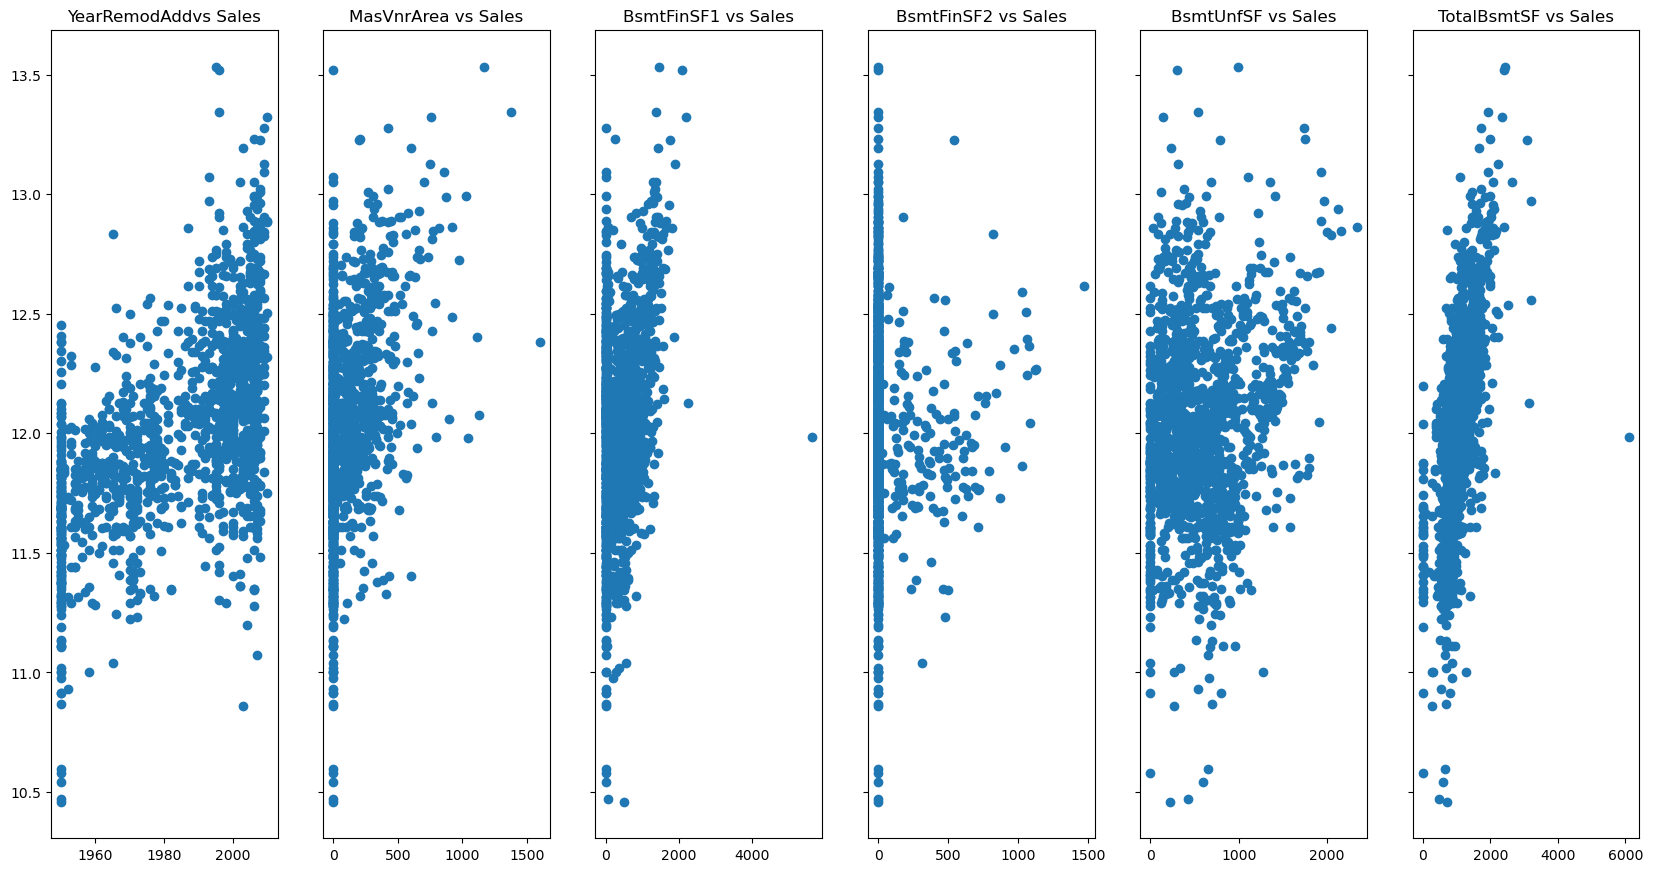

In [42]:
figure, axis = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = axis[0].scatter(train_data['YearRemodAdd'], train_data['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
axis[0].set_title('YearRemodAddvs Sales')

MasVnrArea= axis[1].scatter(train_data['MasVnrArea'], train_data['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
axis[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = axis[2].scatter(train_data['BsmtFinSF1'], train_data['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
axis[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = axis[3].scatter(train_data['BsmtFinSF2'], train_data['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
axis[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = axis[4].scatter(train_data['BsmtUnfSF'], train_data['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
axis[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = axis[5].scatter(train_data['TotalBsmtSF'], train_data['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
axis[5].set_title('TotalBsmtSF vs Sales')


figure.set_size_inches(20.5, 10.5, forward=True)

plt.show()

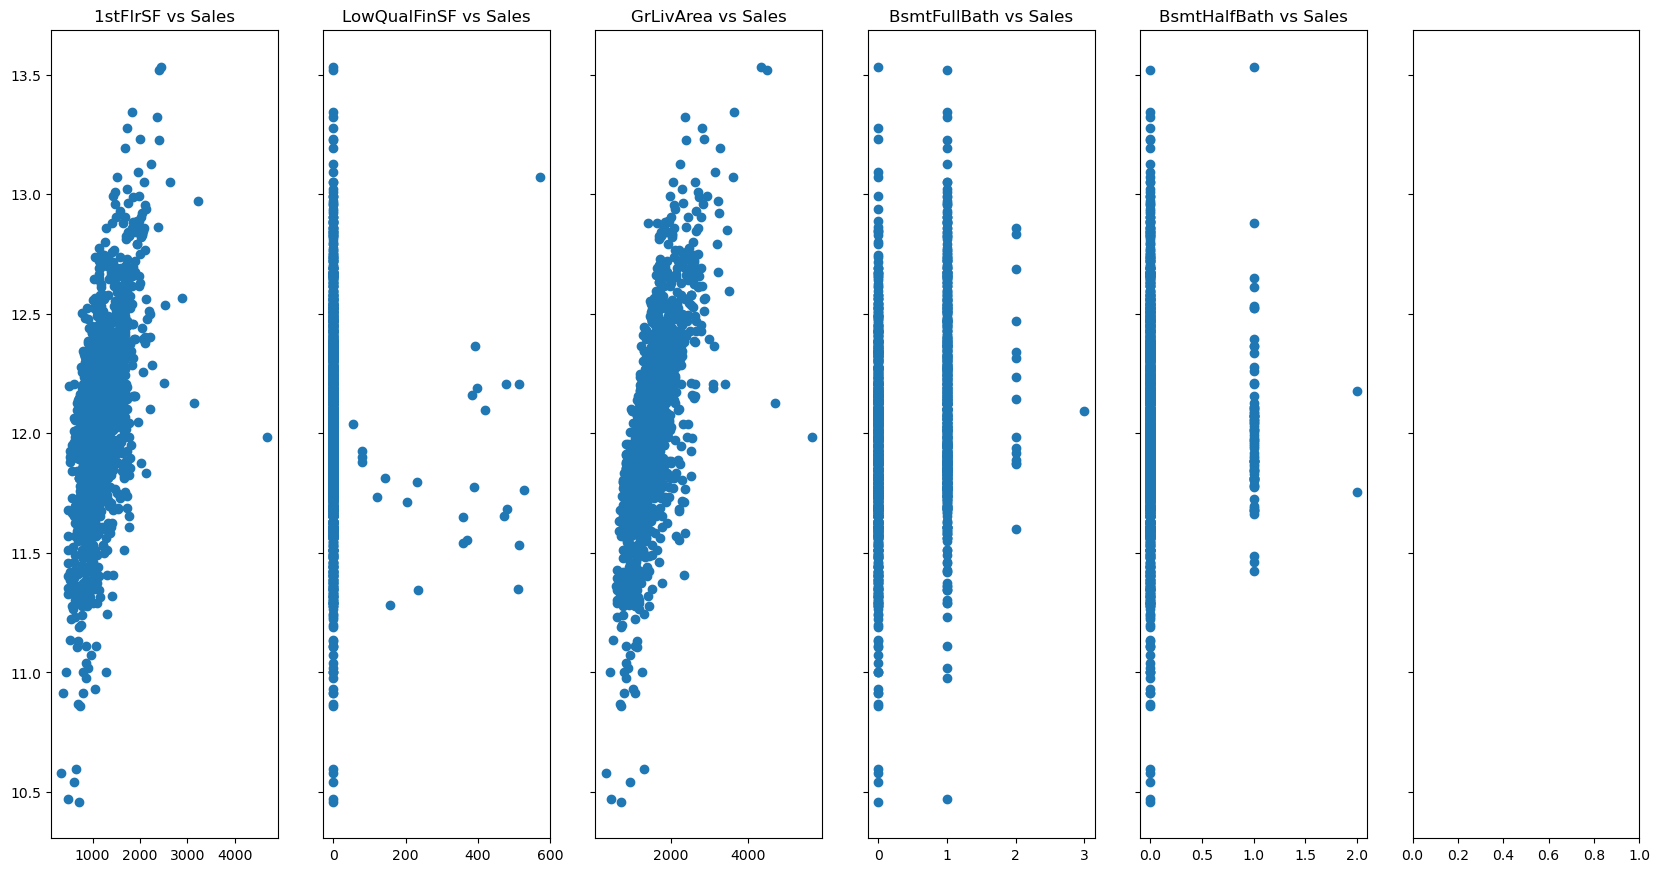

In [43]:
figure, axis = plt.subplots(ncols=6, sharey=True)

stFlrSF = axis[0].scatter(train_data['1stFlrSF'], train_data['SalePrice'])
stFlrSF.set_label("1stFlrSF")
axis[0].set_title('1stFlrSF vs Sales')

LowQualFinSF = axis[1].scatter(train_data['LowQualFinSF'], train_data['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
axis[1].set_title('LowQualFinSF vs Sales')

GrLivArea = axis[2].scatter(train_data['GrLivArea'], train_data['SalePrice'])
GrLivArea.set_label("GrLivArea")
axis[2].set_title('GrLivArea vs Sales')

BsmtFullBath = axis[3].scatter(train_data['BsmtFullBath'], train_data['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
axis[3].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = axis[4].scatter(train_data['BsmtHalfBath'], train_data['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
axis[4].set_title('BsmtHalfBath vs Sales')


figure.set_size_inches(20.5, 10.5, forward=True)

plt.show()

Data Preparation

In [44]:
#preparing data inorder to build the model
#Creating Dummy columns to convert categorical into numerical
train_data = pd.get_dummies(train_data, drop_first=True )
train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
X = train_data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
# Putting response variable to y
y = train_data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [48]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,20,84.0,12615,6,7,1950,2001,0.0,477,0,...,0,0,0,0,1,0,0,0,1,0
1408,70,60.0,7740,4,7,1910,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1148,50,69.0,5700,7,7,1926,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
861,190,75.0,11625,5,4,1965,1965,0.0,841,0,...,0,0,0,0,1,0,0,0,1,0
220,20,73.0,8990,7,5,2006,2006,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [49]:
#lets scale the numerical variables
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [50]:
numerical_variables= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
X_train[numerical_variables].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
175,20,84.0,12615,6,7,1950,2001,0.0,477,0,...,576,0,29,39,0,0,0,0,6,2007
1408,70,60.0,7740,4,7,1910,1950,0.0,0,0,...,528,0,0,0,0,168,0,0,6,2010
1148,50,69.0,5700,7,7,1926,1950,0.0,0,0,...,288,0,0,176,0,0,0,0,8,2008
861,190,75.0,11625,5,4,1965,1965,0.0,841,0,...,504,0,0,0,0,0,0,0,4,2010
220,20,73.0,8990,7,5,2006,2006,0.0,0,0,...,675,351,33,0,0,0,0,0,4,2006


In [51]:
scaler=MinMaxScaler()
X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])

In [52]:
X_train.head()     

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,0.000000,0.215753,0.052887,0.555556,0.750,0.555556,0.850000,0.0,0.084515,0.0,...,0,0,0,0,1,0,0,0,1,0
1408,0.294118,0.133562,0.030101,0.333333,0.750,0.259259,0.000000,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
1148,0.176471,0.164384,0.020566,0.666667,0.750,0.377778,0.000000,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
861,1.000000,0.184932,0.048260,0.444444,0.375,0.666667,0.250000,0.0,0.149008,0.0,...,0,0,0,0,1,0,0,0,1,0
220,0.000000,0.178082,0.035944,0.666667,0.500,0.970370,0.933333,0.0,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1


In [53]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,0.000000,0.178082,0.035640,0.777778,0.500,0.977778,0.950000,0.000000,0.002835,0.0,...,0,0,0,0,1,0,0,0,1,0
530,0.352941,0.219178,0.041599,0.555556,0.500,0.837037,0.650000,0.158926,0.138731,0.0,...,0,0,0,0,1,0,0,0,0,0
1291,0.823529,0.000000,0.001776,0.444444,0.750,0.718519,0.366667,0.194485,0.040928,0.0,...,0,0,0,0,1,0,0,0,1,0
1385,0.176471,0.065068,0.019332,0.333333,0.875,0.348148,0.950000,0.000000,0.130227,0.0,...,0,0,0,0,1,0,0,0,1,0
305,0.000000,0.202055,0.042469,0.777778,0.500,0.955556,0.916667,0.178520,0.259391,0.0,...,0,0,0,0,1,0,0,0,1,0


Model Building

Ridge and Laso regression

In [54]:
#lets start with ridge regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
-0.0916692584880575


In [56]:
alpha = 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-4.97026773e-02, -1.68850287e-02,  1.01633888e-01,  3.73195468e-01,
        2.25473571e-01,  7.55112584e-02,  9.11050458e-02,  5.26368932e-02,
        3.89397889e-02,  6.45694721e-02,  7.10070068e-02,  7.86945889e-02,
        2.31499728e-01,  1.88576271e-01, -2.95822512e-03,  2.63135620e-01,
        1.15586676e-01,  1.25702777e-03,  1.75983527e-01,  6.63139530e-02,
        8.31493437e-02, -6.79983541e-02,  2.00667902e-01,  1.09824796e-01,
       -7.12274111e-02,  1.94351898e-01,  1.00585808e-01,  5.51334070e-02,
        5.01401710e-02,  6.12405531e-02,  6.29517776e-02,  7.73955738e-02,
       -6.85794005e-02, -2.12716627e-02, -4.96783991e-03, -1.80243693e-02,
        1.01093532e-01,  1.23194584e-01,  9.42150752e-02,  5.65702974e-02,
        3.86087320e-03,  2.58552440e-02, -6.22761418e-02, -3.11455916e-03,
        1.95037603e-03, -5.21445791e-03,  4.37264973e-03, -4.58048167e-02,
        3.86270571e-02, -4.83207466e-02, -3.66236748e-02, -2.15448399e-02,
        2.41659569e-02, -

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9260938705966992
0.8773061478617699


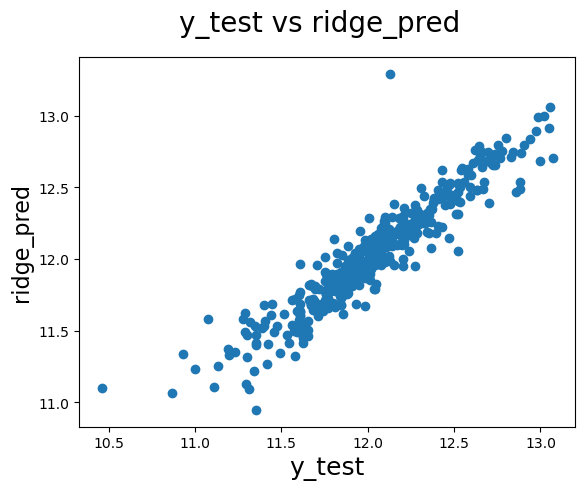

In [58]:
ridge_pred = ridge.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

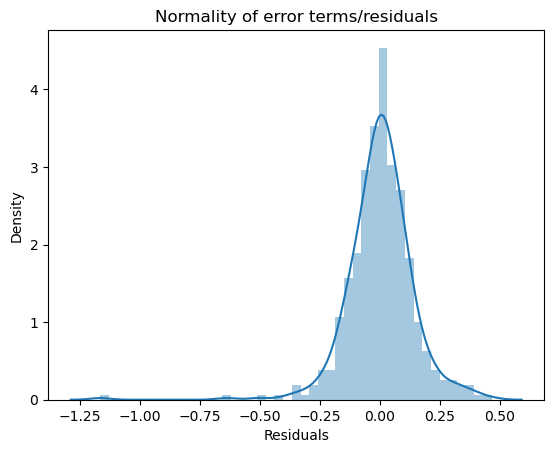

In [59]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [60]:
#laso regression
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.09006214943577595


In [62]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train,y_train) 

Lasso(alpha=0.0001)

In [63]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9444146331743278
0.8497702272357515


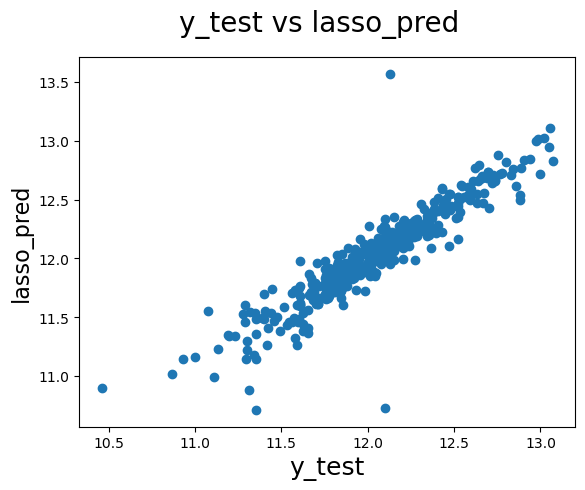

In [64]:
lasso_pred = lasso.predict(X_test)
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

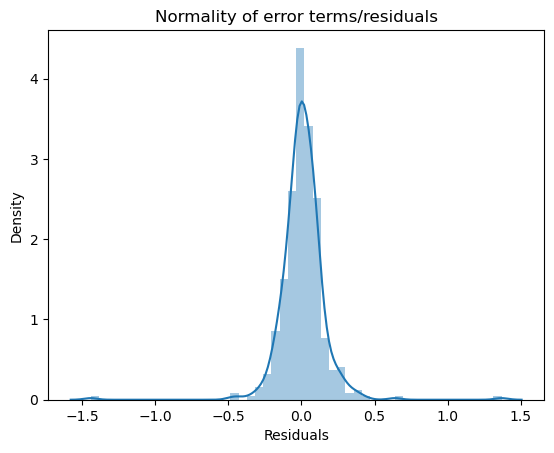

In [65]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [66]:
betas = pd.DataFrame(index=X_train.columns)

In [67]:
betas.rows = X_train.columns

In [68]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [69]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-0.049703,-0.006785
LotFrontage,-0.016885,0.000000
LotArea,0.101634,0.279264
OverallQual,0.373195,0.436687
OverallCond,0.225474,0.307663
YearBuilt,0.075511,0.200703
YearRemodAdd,0.091105,0.067479
MasVnrArea,0.052637,0.038423
BsmtFinSF1,0.038940,0.000000
BsmtFinSF2,0.064569,0.025130
